In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Trainng data dimension:\nFeature: {}, Target: {}'.format(x_train.shape,y_train.shape))
print('\nTesting data dimension:\nFeature: {}, Target: {}'.format(x_test.shape,y_test.shape))

Trainng data dimension:
Feature: (50000, 32, 32, 3), Target: (50000, 1)

Testing data dimension:
Feature: (10000, 32, 32, 3), Target: (10000, 1)


In [3]:
# Rescaling the gray scaled image in the range [0,1]
x_train, x_test = x_train/255, x_test/255

# # Required this exact shape in the convolution layer. 
# # The last dimension refers to the color channel, 1 for black and while ie gray scaled image
# x_train, x_test = x_train.reshape(50000,32,32,3), x_test.reshape(10000,32,32,3)

In [4]:
x_train.shape[1:]

(32, 32, 3)

In [11]:
nClass = len(set(y_train[:,0]))
print('Total  number of classes for classification: {}'.format(nClass))
cifar10_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                  'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

cifar10_dict = dict(zip(range(nClass), cifar10_labels))

Total  number of classes for classification: 10


In [13]:
cifar10_dict

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

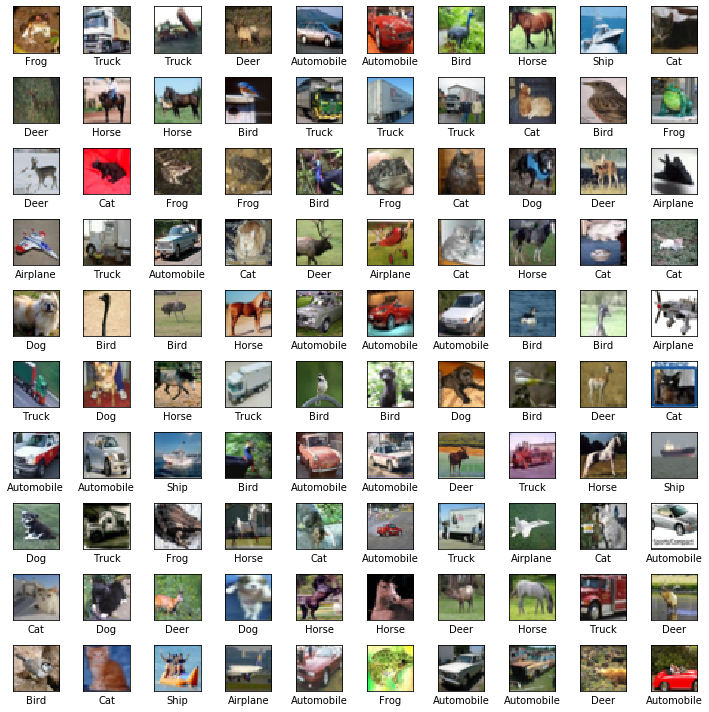

In [14]:
# cmap=plt.cm.binary
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_train)[i])
    plt.xlabel(cifar10_dict[y_train[i,0]])
plt.tight_layout()
plt.show()

In [26]:
# Encoding the target classes (categorical target)
y_train_encode = to_categorical(y_train, num_classes=nClass)
# y_test_encode = to_categorical(y_test, num_classes=nClass)
y_train_encode

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
input_image_shape = x_train.shape[1:]
input_image_shape

(32, 32, 3)

## Building the model

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=input_image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=input_image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
model.fit(x_train,y_train_encode,epochs=15,validation_data=(x_test,y_test_encode),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.4808 - accuracy: 0.4648 - val_loss: 1.2254 - val_accuracy: 0.5639
Epoch 2/15
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.1461 - accuracy: 0.5972 - val_loss: 1.1910 - val_accuracy: 0.5818
Epoch 3/15
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.9921 - accuracy: 0.6537 - val_loss: 1.0446 - val_accuracy: 0.6342
Epoch 4/15
50000/50000 [==============================] - 153s 3ms/sample - loss: 0.8800 - accuracy: 0.6926 - val_loss: 0.9939 - val_accuracy: 0.6595
Epoch 5/15
50000/50000 [==============================] - 89s 2ms/sample - loss: 0.7923 - accuracy: 0.7236 - val_loss: 0.9806 - val_accuracy: 0.6631
Epoch 6/15
50000/50000 [==============================] - 89s 2ms/sample - loss: 0.7111 - accuracy: 0.7512 - val_loss: 1.0050 - val_accuracy: 0.6680
Epoch 7/15
50000/50000 [=============================

# Evaluate the Model

In [19]:
metric = pd.DataFrame(model.history.history)

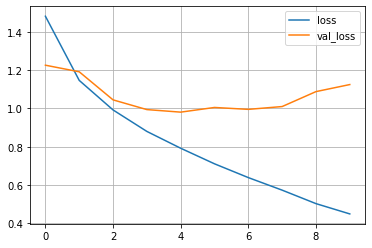

In [20]:
metric[['loss', 'val_loss']].plot(grid=True)

In [27]:
predictions = model.predict_classes(x_test)

In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.84      0.73      0.78      1000
           2       0.57      0.54      0.55      1000
           3       0.47      0.46      0.47      1000
           4       0.59      0.65      0.62      1000
           5       0.51      0.59      0.55      1000
           6       0.67      0.79      0.73      1000
           7       0.75      0.66      0.70      1000
           8       0.80      0.77      0.78      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



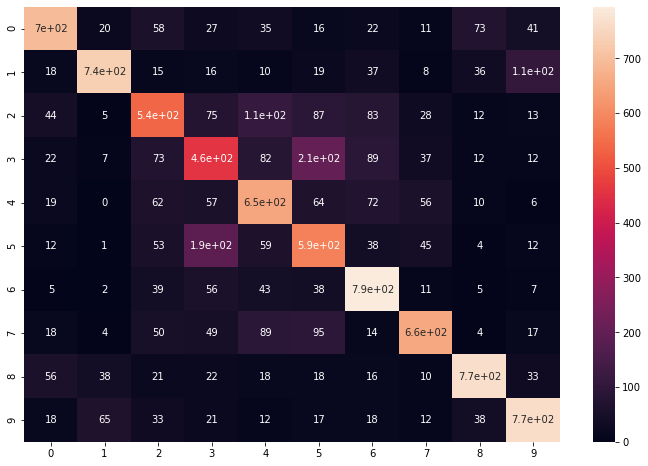

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

In [32]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

There are in total 3342 misclassified digits. Some of them are,


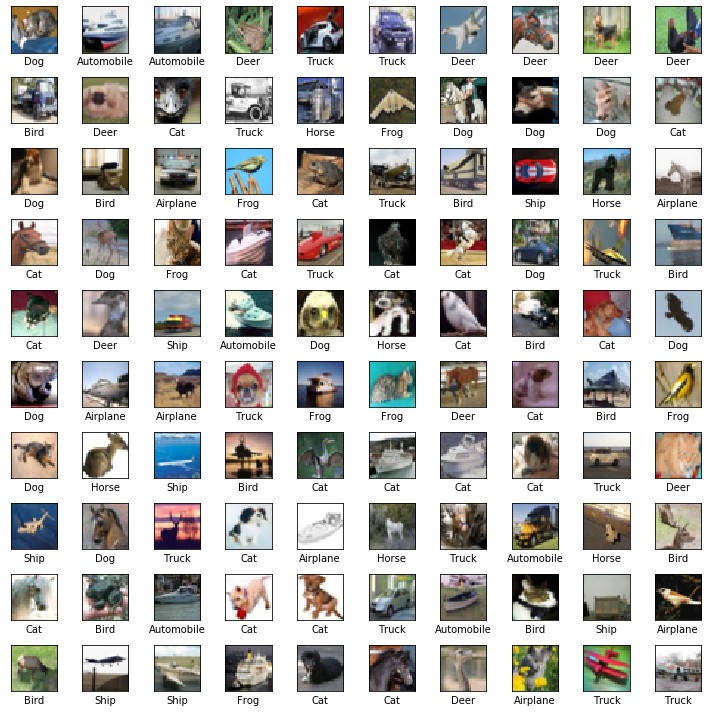

In [34]:
_ = list(predictions==y_test.flatten())
wrong_index = [i for i, __ in enumerate(_) if not __]
print('There are in total {} misclassified digits. Some of them are,'.format(len(wrong_index)))
plt.figure(figsize=(10,10))
for count, i in enumerate(wrong_index[0:100]):
    plt.subplot(10, 10, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_test)[i], cmap=plt.cm.binary)
    plt.xlabel(cifar10_dict[predictions[i]])
plt.tight_layout()
plt.show()